# Task 3: Heart Disease Prediction

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [3]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode categorical columns (if any)
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Confirm all are numeric now
df.info()

Missing values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   int64  
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholesto

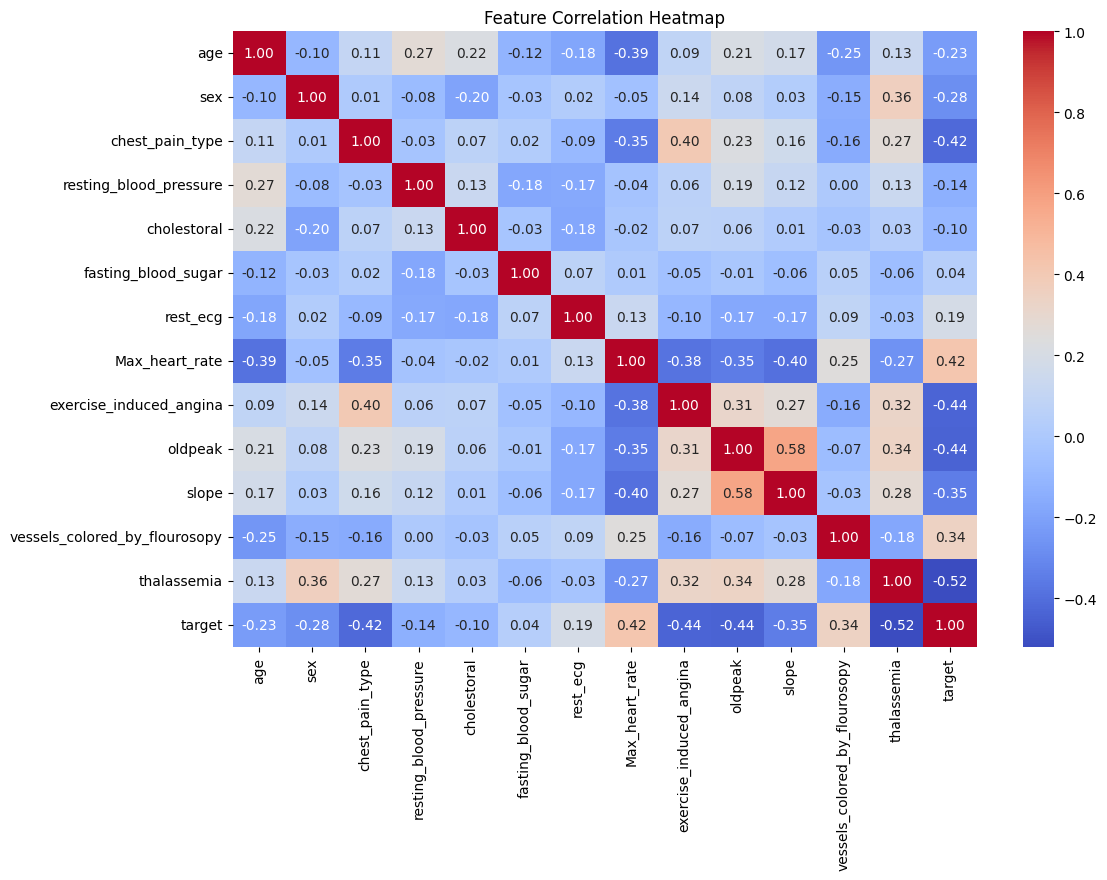

In [9]:
# Plot correlation matrix using only numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
# Split data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

#DecisionTree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [12]:
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix (LR):\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix (Tree):\n", confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.7951219512195122
Confusion Matrix (LR):
 [[76 26]
 [16 87]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Decision Tree Accuracy: 0.824390243902439
Confusion Matrix (Tree):
 [[73 29]
 [ 7 96]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       102
           1       0.77      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



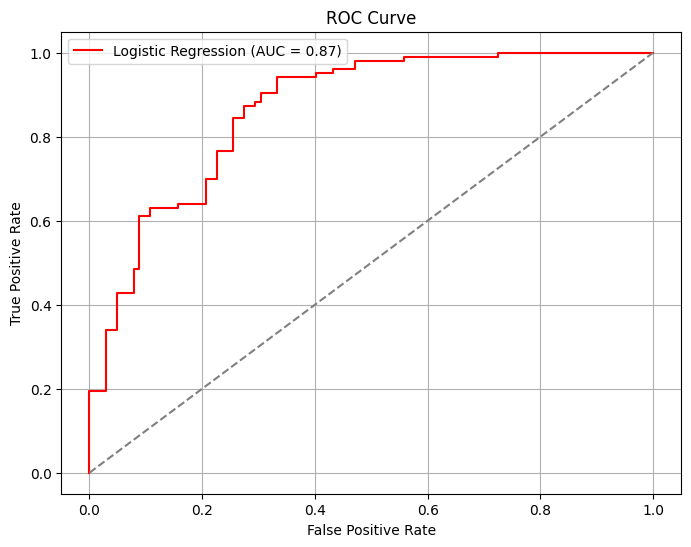

In [14]:
# ROC for Logistic Regression
y_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


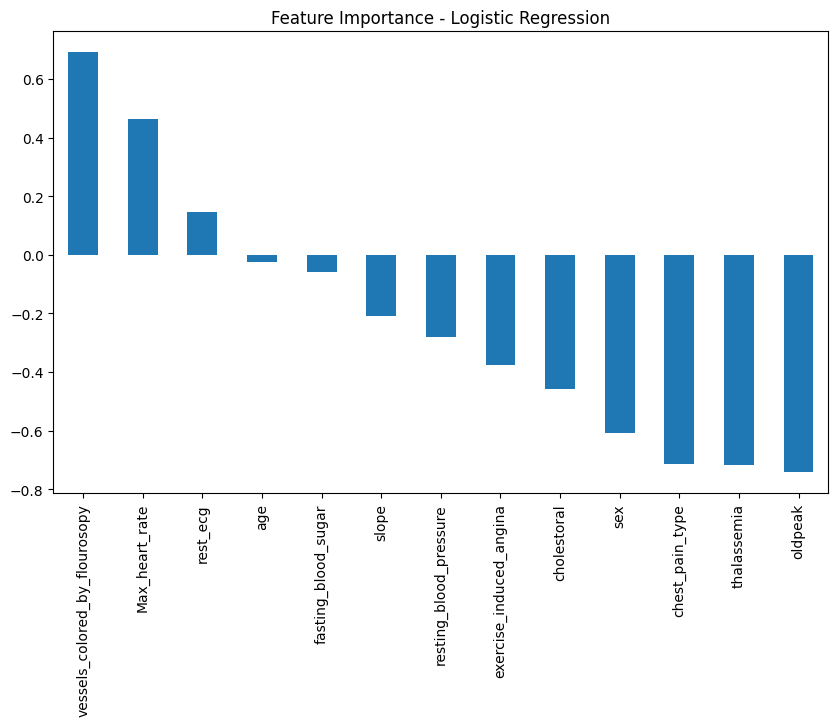

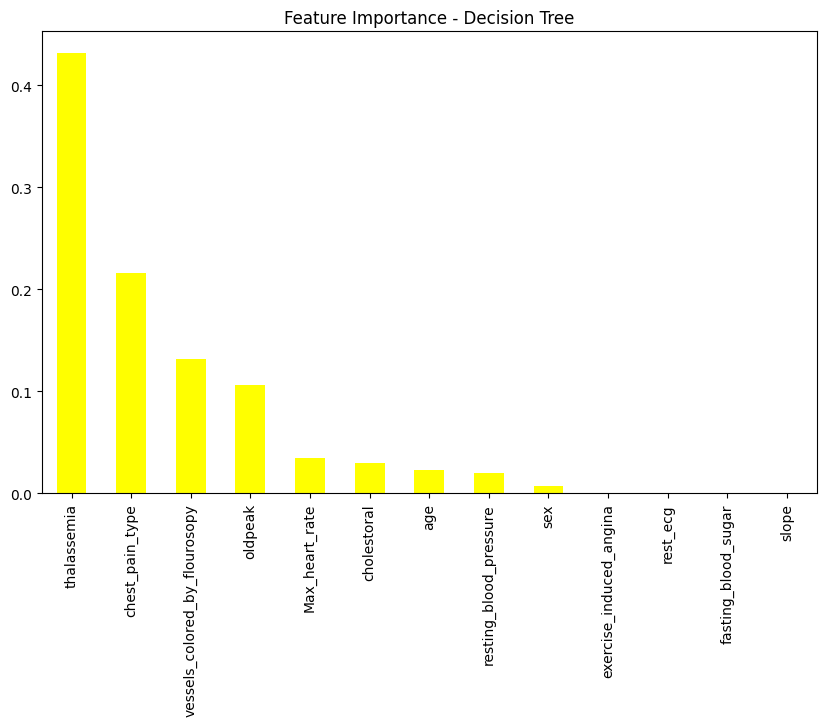

In [18]:
#Logistic Regression Coefficients
importance = pd.Series(logreg.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Feature Importance - Logistic Regression")
plt.show()
#Decision Tree Feature Importance
tree_importance = pd.Series(tree.feature_importances_, index=X.columns)
tree_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Feature Importance - Decision Tree" , color="yellow")
plt.show()